# Using the Qiskit `quantum-info` module

Why `quantum-info` ? 

The `quantum-info` module helps simulate <b>quantum properties</b> of <b>output state</b> of a quantum circuit 

## 1) Install and Import Dependencies

In [2]:
!pip install qiskit
!pip install qiskit_aer

In [3]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

## 2) Testing a Basic Quantum Circuit

In [5]:
#Create a quantum circuit with 1 qubit:
qc = QuantumCircuit(1)
qc.draw()

q:

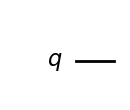

In [6]:
qc.draw(output='mpl') #Looks better (using matplotlib)

In [74]:
#Obtaining its state vector:
ψ = qi.Statevector(qc)
print(ψ)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [75]:
ψ.draw('latex') #Displays in Dirac notation

<IPython.core.display.Latex object>

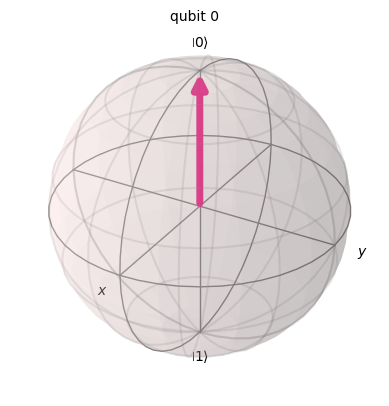

In [76]:
ψ.draw('bloch') #Shows as a vector on the bloch sphere

### Now let's try applying the <b>X gate</b> to the qubit...

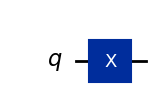

In [77]:
#Applying X to qubit 0 (qubit numbering starts from 0 in Qiskit):
qc.x(0)
qc.draw(output='mpl')

In [78]:
ψ = qi.Statevector(qc)
ψ.draw('latex')

<IPython.core.display.Latex object>

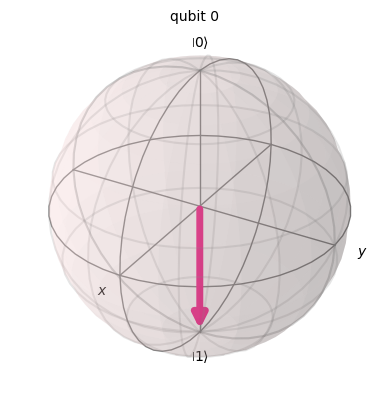

In [79]:
ψ.draw('bloch')

### Now let's try applying the <b>H gate </b> to the qubit...

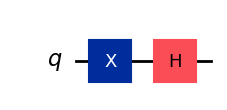

In [80]:
#Applying H gate to qubit 0:
qc.h(0)
qc.draw(output='mpl')

In [81]:
ψ = qi.Statevector(qc)
ψ.draw('latex')

<IPython.core.display.Latex object>

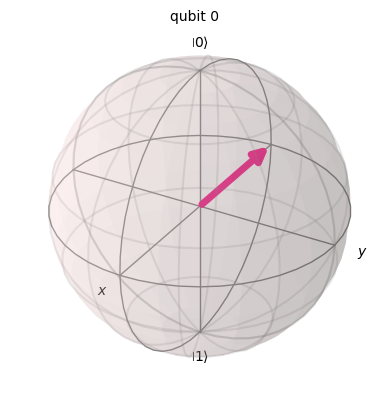

In [82]:
ψ.draw('bloch')

In [83]:
#Obtaining the probabilities of measuring 0 or 1:
probabilities = ψ.probabilities()
print(probabilities)

[0.5 0.5]


### Let's see what happens if we perform a <b>measurement operation</b>...

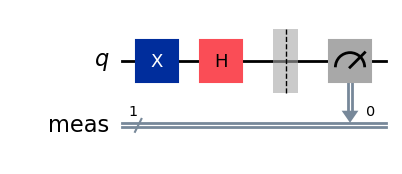

In [84]:
#Adding a measurement operation to qubit 0:
qc.measure_all()
qc.draw('mpl')

In [85]:
ψ = qi.Statevector(qc)
ψ.draw('latex')

QiskitError: 'Cannot apply instruction with classical bits: measure'

* We see that the `quantum-info` module is only for a theoretical analysis of the quantum properties of the quantum circuit.
* Hence, the measurement operation (which destroys the quantum properties by means of wave function collapse) <b>CANNOT</b> be use with the `quantum-info` module.
* In order to perform simulations and get actual measurements, we must use simulators like `AerSimulator()` or run it on real Quantum hardware using primitives through `qiskit_ibm_runtime`. 

### But for theoretical treatment (for example while learning and implementing an algorithm) it is useful.

NOTE: There is a way to simulate the circuit anyways (but not recommended due to performance issues) : [More on this later]

## 3) Trying out multi-qubit circuits

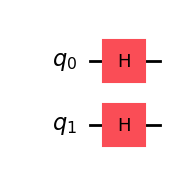

In [86]:
qc = QuantumCircuit(2)
qc.h([0,1]) #Applying Hadamard to a list of qubits (q0 and q1)
qc.draw('mpl')

In [87]:
#Obtaining the statevector for the same:
ψ = qi.Statevector(qc)
ψ.draw('latex')

<IPython.core.display.Latex object>

This is an <b>equal supersition state</b> : A trademark of the Hadamard gate (verify mathematically)

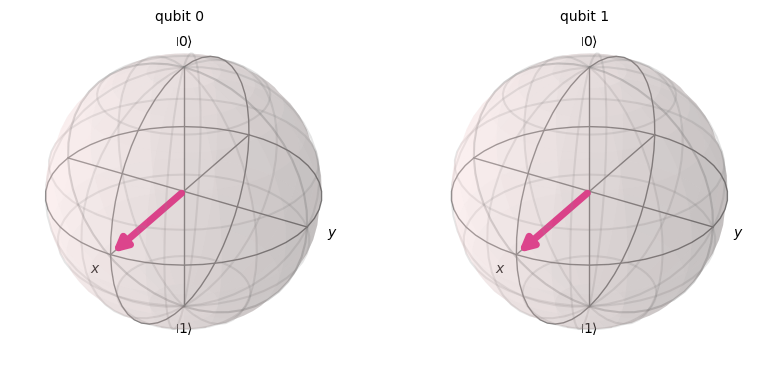

In [88]:
ψ.draw('bloch')

In [89]:
#Obtaining probabilites of each state:
probs = ψ.probabilities()
print(probs)

[0.25 0.25 0.25 0.25]


Probability of 1/4 for each of the |00> |01> |10> and |11> states upon measurement
(Modulus square of probability <b>amplitudes</b>

### Simulating runs of the circuit (to justify this probability)

In [91]:
#We can actually simulate runs of this circuit without QiskitAer 
#(but not recommended because AerSimulator is much more efficient in its implementation)
counts = ψ.sample_counts(shots=1000)
print(counts)

{'00': 253, '01': 239, '10': 260, '11': 248}


NOTE: There are different counts everytime (because measurement is probabilistic in nature)

### Visualizing the counts (using qiskit visualization package)

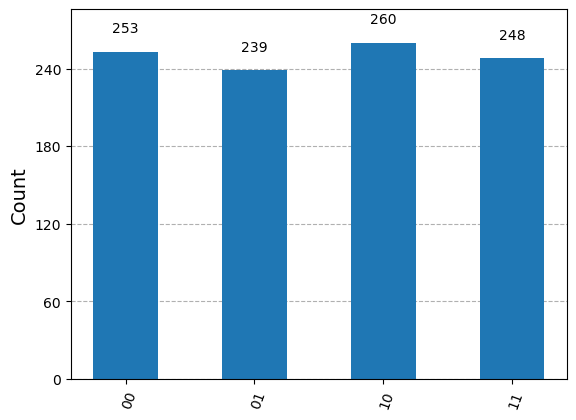

In [92]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [93]:
#We can also obtain the actual samples themselves (not just the sample counts):
samples = ψ.sample_memory(shots=10)
print(samples)

['01' '10' '10' '10' '11' '11' '10' '00' '11' '10']


### Now let's check out some other quantum properties... 

### Firstly, let us try to find the expectation value of the statevector $|\psi\rangle$ with respect to some observable

In [95]:
#Define the observable, O:
O = qi.SparsePauliOp(['ZZ','XX','II'],[0.2,-0.3,0.4])
print(O)

SparsePauliOp(['ZZ', 'XX', 'II'],
              coeffs=[ 0.2+0.j, -0.3+0.j,  0.4+0.j])


In [98]:
O = O.to_operator()
print(O)
O.draw('latex')

Operator([[ 0.6+0.j,  0. +0.j,  0. +0.j, -0.3+0.j],
          [ 0. +0.j,  0.2+0.j, -0.3+0.j,  0. +0.j],
          [ 0. +0.j, -0.3+0.j,  0.2+0.j,  0. +0.j],
          [-0.3+0.j,  0. +0.j,  0. +0.j,  0.6+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


<IPython.core.display.Latex object>

In [99]:
expectation_value = ψ.expectation_value(O)
print(expectation_value)

(0.10000000000000002+0j)


So the expectation value of the statevector $|\psi\rangle$ with respect to the observable O = 0.1 according to the simulator.

This can be verified mathematically by computing $$exp_{}val = \langle\psi|O|\psi\rangle$$

### Now let us have a look at the computation of the density matrix of the circuit output

In [100]:
ρ = qi.DensityMatrix(qc)
print(ρ)

DensityMatrix([[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
               [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
               [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
               [0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j]],
              dims=(2, 2))


In [101]:
ρ.draw('latex')

<IPython.core.display.Latex object>

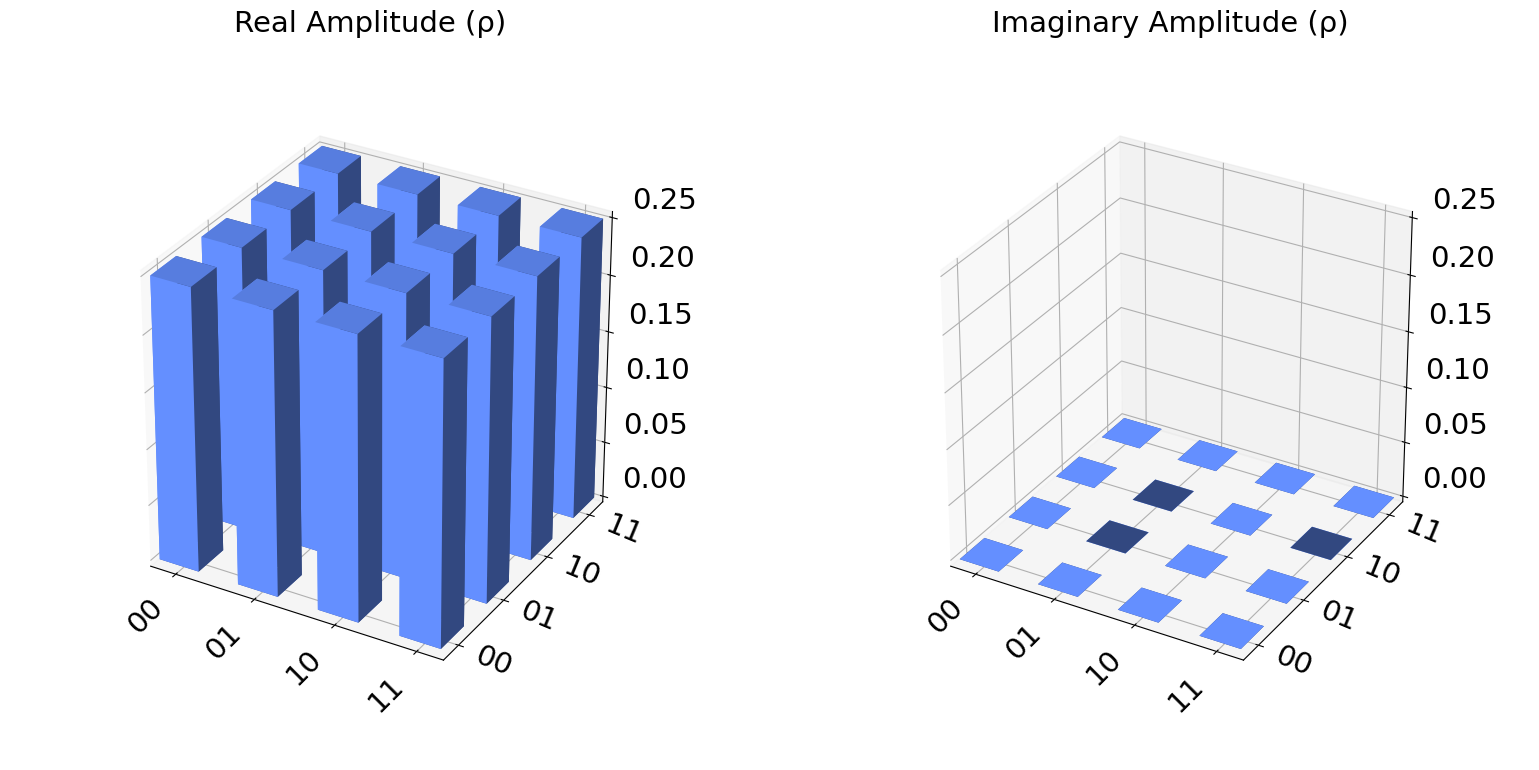

In [102]:
ρ.draw('city')

In [105]:
#Partial trace for qubit 0:
ρ_q0 = qi.partial_trace(ρ,[0]) #List of qubits to take partial trace of
ρ_q0.draw('latex')

<IPython.core.display.Latex object>

### Very Cool : Find the <b>Unitary Matrix</b> of the circuit

In [106]:
U = qi.Operator(qc)
print(U)

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [107]:
U.draw('latex')

<IPython.core.display.Latex object>

So, we can use `qi.Operator(<quantum_circuit_name>)` to find the unitary matrix that corresponds to the entire circuit, which is very useful when verifying the correctness of circuits. 

## 4) Exercize: The Bell State

<b>QUESTION:</b> Create a circuit for the maximally entangled bell state: $$|\phi^{+}\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$
Following this, use the `quantum-info` module to check the following:
* Output statevector (Dirac notation + Bloch sphere representation)
* Measurement probabilities for each state + histogram visualization
* Unitary matrix of the circuit

## 5) Homework: The GHZ State

First of all, what is a GHZ state?
A GHZ state is a generalized version of the Bell state to "n" qubits. For example, a 3-qubit GHZ state would be: $$|GHZ_{3}\rangle = \frac{1}{\sqrt{2}} (|000\rangle + |111\rangle)$$
Another example, a 5-qubit GHZ state would be: $$|GHZ_{5}\rangle = \frac{1}{\sqrt{2}}(|00000\rangle + |11111\rangle)$$

<b>QUESTION:</b> Your task is create a Python function that takes as input a integer "n" and creates an n-qubit GHZ state: $|GHZ_{n}\rangle$ and uses the `quantum-info` module to get the:
* Resultant statevector (Dirac notation + Bloch sphere representation)
* Measurement probabilities for each state + histogram visualization
* Unitary matrix of the circuit

[Try this for n = 3,5,8 and verify your results]

<b>ADDITIONAL QUESTION:</b> If you know how to run jobs on real IBM Quantum hardware, try running your circuit for an 8-qubit GHZ state. Do the actual results match with the theoretically expected result? Why or why not? 